In [1]:
import json
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
from keras.models import Sequential 
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer


In [5]:
import torch 
from torch.utils.data import Dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification,BertTokenizerFast
from transformers import TFDistilBertForSequenceClassification,TFTrainingArguments
from transformers import BertTokenizer,TFBertForSequenceClassification,BertConfig
from transformers import TrainingArguments,Trainer

In [6]:
def load_json_file(file):
    with open(file,encoding='utf-8') as f:
        file_name = json.load(f)
    return file_name

file = "intents.json"
intents = load_json_file(file)

In [7]:
def creating_df():
    df = pd.DataFrame({
         'Pattern' : [],
         'Tag' : []
    })
    return df

df = creating_df()
df

,Pattern,Tag


In [8]:
def extract_json_file(json_file,df):
    for intent in json_file['intents']:
        for pattern in intent['patterns']:
            sentence_tag = [pattern,intent['tag']]
            df.loc[len(df.index)] = sentence_tag
    return df

df = extract_json_file(intents,df)
df.head()

,Pattern,Tag
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting


In [9]:
df_2 = df.copy()
df_2.head()

,Pattern,Tag
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting


In [10]:
def print_shape_df(df,ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")

print_shape_df(df,"Chatbot")

Chatbot dataset has 910 rows and 2 columns


In [11]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())

print_dfInfo(df,"Chatbot")

The info of Chatbot dataset

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 909
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  910 non-null    object
 1   Tag      910 non-null    object
dtypes: object(2)
memory usage: 21.3+ KB
None


In [12]:
def num_classes(df,target_col,ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")

num_classes(df,'Tag', 'Chatbot')

The Chatbot dataset has 255 classes


In [13]:
def check_null(df,ds_name="df"):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df,"Chatbot")

Null Values in each col in the Chatbot dataset:

Pattern    0
Tag        0
dtype: int64


AttributeError: Text.set() got an unexpected keyword argument 'fontsie'

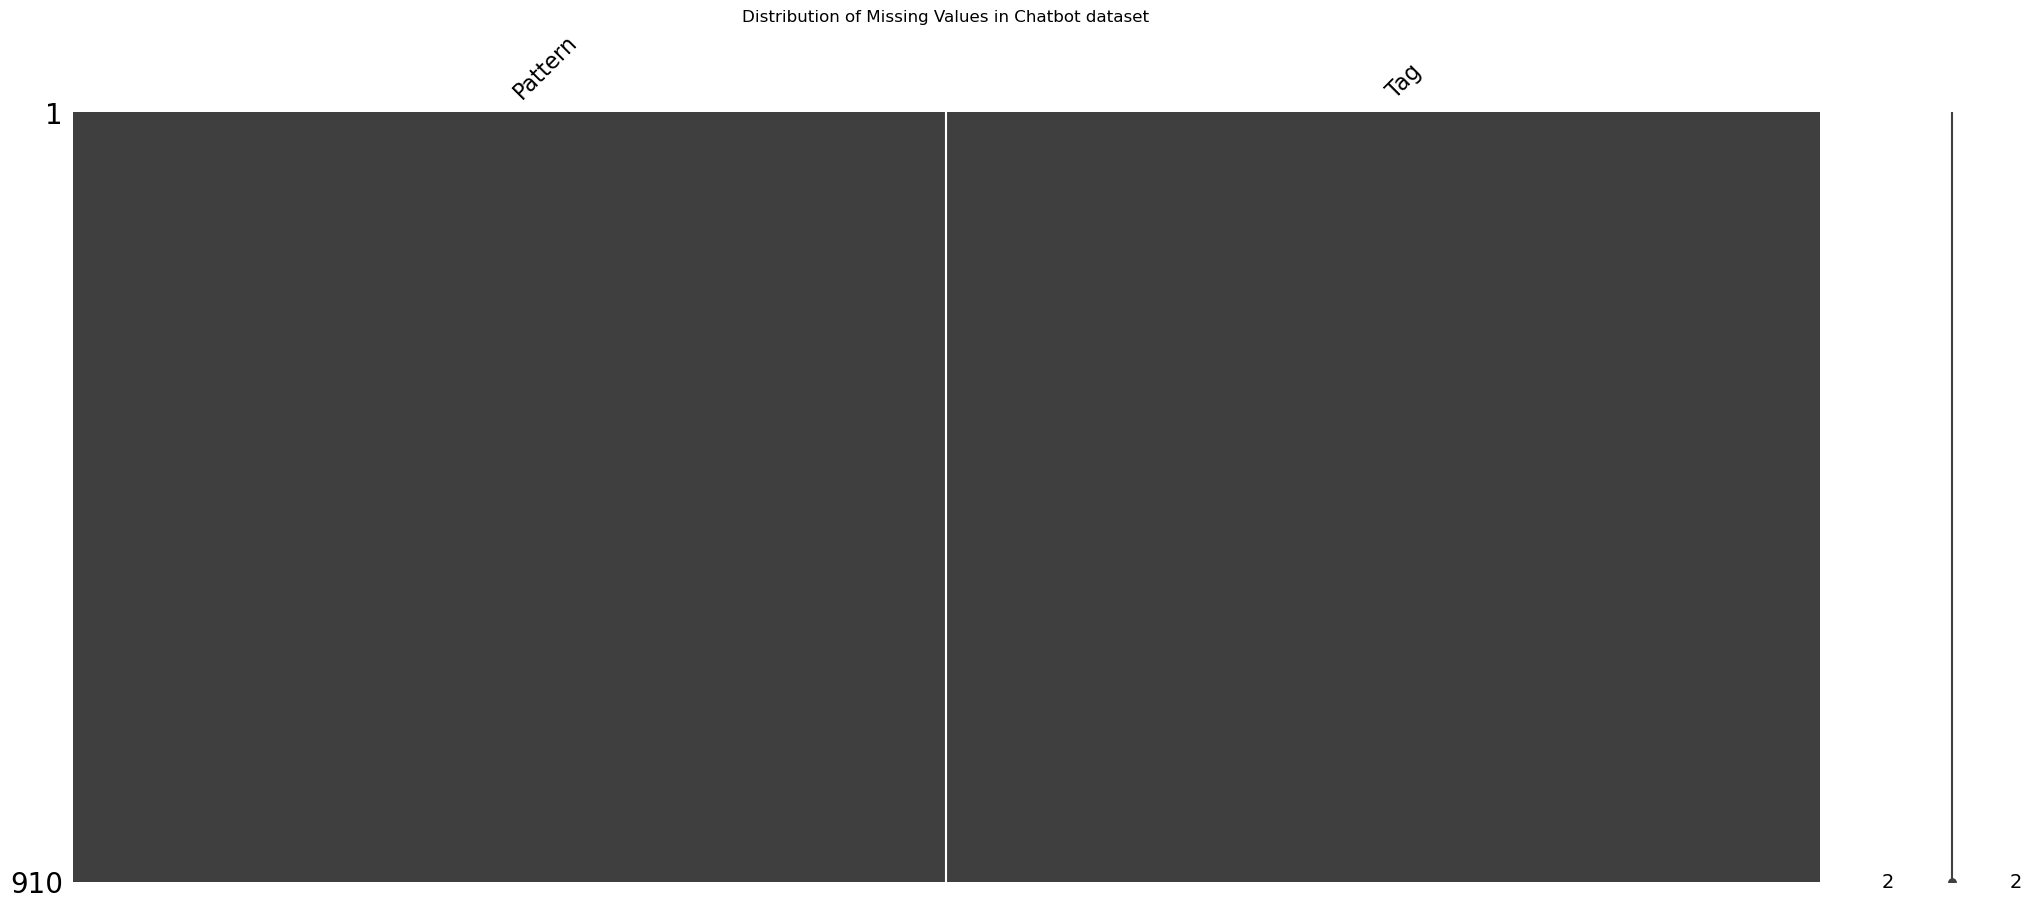

In [14]:
def plot_miss_vals(df,ds_name="df"):
    msno.matrix(df)
    plt.title(f"Distribution of Missing Values in {ds_name} dataset",fontsie=30,fontstyle='oblique')
    plt.show()

plot_miss_vals(df,"Chatbot")

In [15]:
stemmer = PorterStemmer()
ignore_words=['?','!',',','.']

def preprocess_pattern(pattern):
    words=word_tokenize(pattern.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
    return " ".join(stemmed_words)

df['Pattern'] = df['Pattern'].apply(preprocess_pattern)

In [16]:
df.head()

,Pattern,Tag
0,hi there,greeting
1,how are you,greeting
2,is anyon there,greeting
3,hey,greeting
4,hola,greeting


In [17]:
print(df['Pattern'].isnull().sum())

0


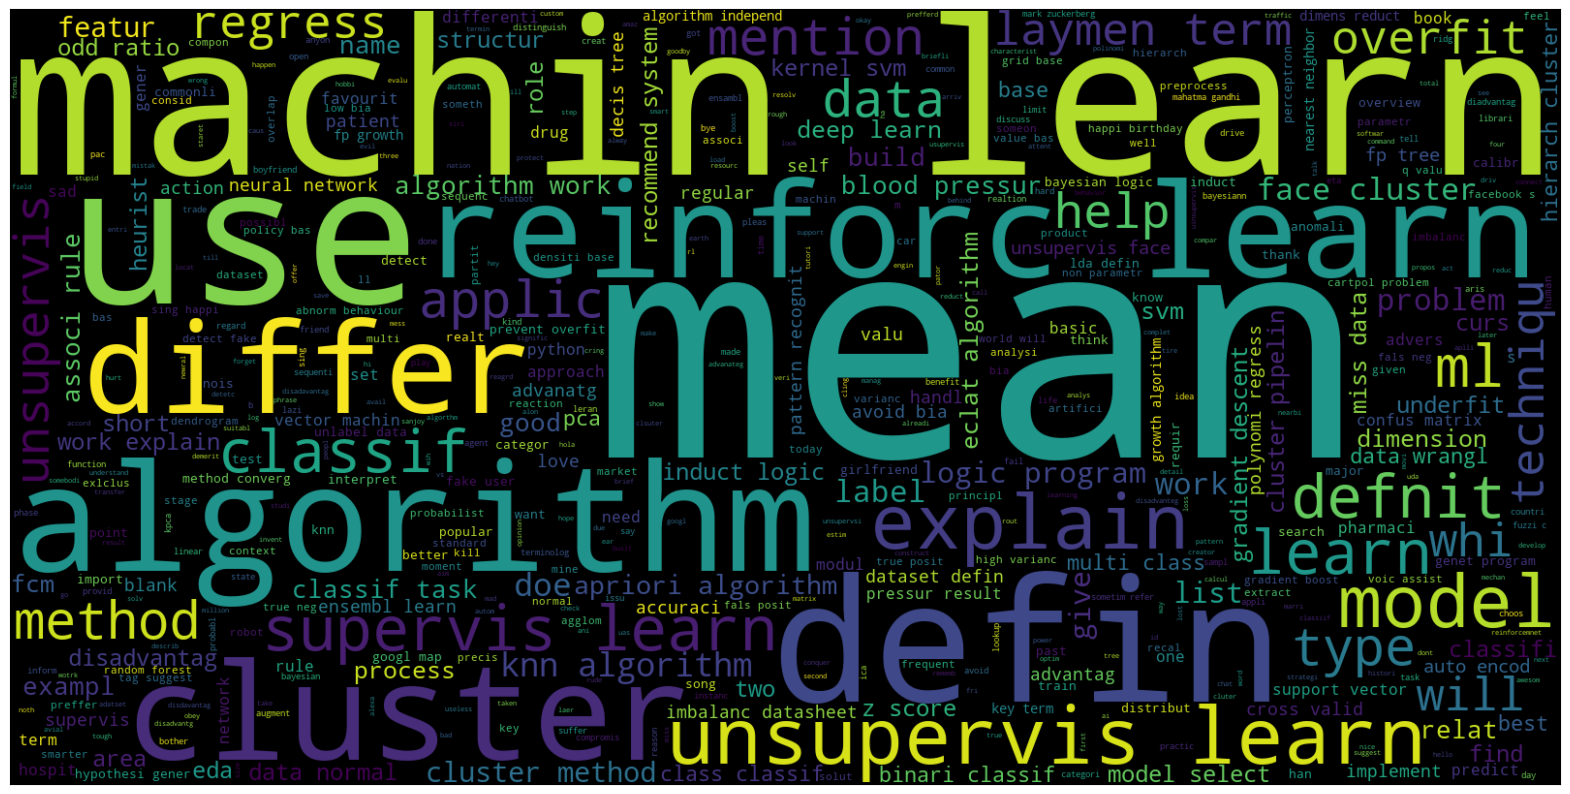

In [18]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,width=1600,height=800,stopwords=STOPWORDS).generate(' '.join(df['Pattern']))
plt.imshow(wc,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
#Visualize top words
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.Pattern)
corpus[:5]

['hi', 'there', 'how', 'are', 'you']

In [20]:
print(f"dataset contains {len(corpus)} words")

dataset contains 5525 words


In [21]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'what': 293,
 'learn': 261,
 'of': 259,
 'the': 221,
 'is': 179,
 'you': 133,
 'in': 128,
 'are': 118,
 'algorithm': 115,
 'machin': 107}

In [22]:
#Data Preprocessing
df_2.head()

,Pattern,Tag
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting


In [23]:
labels = df_2['Tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['greeting',
 'goodbye',
 'thanks',
 'options',
 'adverse_drug',
 'blood_pressure',
 'blood_pressure_search',
 'pharmacy_search',
 'hospital_search',
 'Concern',
 'Appreciation',
 'Please',
 'Criticism',
 'Personal',
 'LifeQueries',
 'diff_classreg',
 'traintest',
 'Ensemble',
 'LowBi_HighVar',
 'diff_RF_GB',
 'Neural_Network',
 'Deep_Learning',
 'diff_DPDPDW',
 'building_a_model',
 'choose_algo',
 'BiasML',
 'Variance',
 'ML_DL',
 'Prec_Rec',
 'Para',
 'SupLearn',
 'types_SL',
 'Classification_algo',
 'ClassDef',
 'Eg_Class',
 'Reg',
 'Reg_Eg',
 'Class_Tasks',
 'BinaryClass',
 'distributionBC',
 'pop_algo',
 'MCC',
 'distrbutionMC',
 'Pop_algoMC',
 'MLC',
 'imbalanced_classification',
 'use_reg',
 'types_reg',
 'func_SL',
 'standard_approach',
 'classifier',
 'SVM',
 'meth_SVM',
 'Confusion_Matrix',
 'Exp_TP_TN_FP_FN',
 'ml',
 'difference between Data Mining and Machine learning',
 'Overfitting',
 'Why overfitting happens',
 'avoid overfitting',
 'inductive machine learning',
 'algori

In [24]:
num_labels = len(labels)
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

In [25]:
id2label

{0: 'greeting',
 1: 'goodbye',
 2: 'thanks',
 3: 'options',
 4: 'adverse_drug',
 5: 'blood_pressure',
 6: 'blood_pressure_search',
 7: 'pharmacy_search',
 8: 'hospital_search',
 9: 'Concern',
 10: 'Appreciation',
 11: 'Please',
 12: 'Criticism',
 13: 'Personal',
 14: 'LifeQueries',
 15: 'diff_classreg',
 16: 'traintest',
 17: 'Ensemble',
 18: 'LowBi_HighVar',
 19: 'diff_RF_GB',
 20: 'Neural_Network',
 21: 'Deep_Learning',
 22: 'diff_DPDPDW',
 23: 'building_a_model',
 24: 'choose_algo',
 25: 'BiasML',
 26: 'Variance',
 27: 'ML_DL',
 28: 'Prec_Rec',
 29: 'Para',
 30: 'SupLearn',
 31: 'types_SL',
 32: 'Classification_algo',
 33: 'ClassDef',
 34: 'Eg_Class',
 35: 'Reg',
 36: 'Reg_Eg',
 37: 'Class_Tasks',
 38: 'BinaryClass',
 39: 'distributionBC',
 40: 'pop_algo',
 41: 'MCC',
 42: 'distrbutionMC',
 43: 'Pop_algoMC',
 44: 'MLC',
 45: 'imbalanced_classification',
 46: 'use_reg',
 47: 'types_reg',
 48: 'func_SL',
 49: 'standard_approach',
 50: 'classifier',
 51: 'SVM',
 52: 'meth_SVM',
 53: 'C

In [26]:
label2id

{'greeting': 0,
 'goodbye': 1,
 'thanks': 2,
 'options': 3,
 'adverse_drug': 4,
 'blood_pressure': 5,
 'blood_pressure_search': 6,
 'pharmacy_search': 7,
 'hospital_search': 8,
 'Concern': 9,
 'Appreciation': 10,
 'Please': 11,
 'Criticism': 12,
 'Personal': 13,
 'LifeQueries': 14,
 'diff_classreg': 15,
 'traintest': 16,
 'Ensemble': 17,
 'LowBi_HighVar': 18,
 'diff_RF_GB': 19,
 'Neural_Network': 20,
 'Deep_Learning': 21,
 'diff_DPDPDW': 22,
 'building_a_model': 23,
 'choose_algo': 24,
 'BiasML': 25,
 'Variance': 26,
 'ML_DL': 27,
 'Prec_Rec': 28,
 'Para': 29,
 'SupLearn': 30,
 'types_SL': 31,
 'Classification_algo': 32,
 'ClassDef': 33,
 'Eg_Class': 34,
 'Reg': 35,
 'Reg_Eg': 36,
 'Class_Tasks': 37,
 'BinaryClass': 38,
 'distributionBC': 39,
 'pop_algo': 40,
 'MCC': 41,
 'distrbutionMC': 42,
 'Pop_algoMC': 43,
 'MLC': 44,
 'imbalanced_classification': 45,
 'use_reg': 46,
 'types_reg': 47,
 'func_SL': 48,
 'standard_approach': 49,
 'classifier': 50,
 'SVM': 51,
 'meth_SVM': 52,
 'Confu

In [27]:
df_2['labels'] = df_2['Tag'].map(lambda x : label2id[x.strip()])
df_2.head()

,Pattern,Tag,labels
0,Hi there,greeting,0
1,How are you,greeting,0
2,Is anyone there?,greeting,0
3,Hey,greeting,0
4,Hola,greeting,0


In [28]:
#Splitting of data into train and test data
X = list(df_2['Pattern'])
X[:5]

['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola']

In [29]:
y= list(df_2['labels'])
y[:5]

[0, 0, 0, 0, 0]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [31]:
#Loading BERT pretrained model and Tokenizer
model_name = "bert-base-uncased"
max_len = 256

tokenizer = BertTokenizer.from_pretrained(model_name,max_length=max_len)

model = BertForSequenceClassification.from_pretrained(model_name,num_labels=num_labels,
                                                      id2label=id2label, label2id=label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
#Encoding 
train_encoding = tokenizer(X_train,truncation=True,padding=True)
test_encoding = tokenizer(X_test,truncation=True,padding=True)

In [33]:
full_data = tokenizer(X,truncation=True,padding=True)

In [34]:
#Building Data loader
class DataLoader(Dataset):
    def __init__(self,encodings,labels):

        self.encodings = encodings
        self.labels = labels

    def __getitem__(self,idx):

        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [35]:
train_dataloader = DataLoader(train_encoding,y_train)
test_dataloader = DataLoader(test_encoding,y_test)

In [36]:
fullDataLoader = DataLoader(full_data,y_test)

In [37]:
#Defining evaluation metrics
def evaluation_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision,recall,f1,_ = precision_recall_fscore_support(labels,preds,average='macro')
    acc= accuracy_score(labels,preds)
    return{
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [38]:
#defining Training arguments

training_args = TrainingArguments(
    output_dir = './output',
    do_train = True,
    do_eval = True,
    num_train_epochs=100,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    warmup_steps = 100,
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    load_best_model_at_end=True
    
)


In [39]:
trainer = Trainer(
    model= model,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=test_dataloader,
    compute_metrics=evaluation_metrics
)

In [40]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,5.549600,5.504970,0.008772,0.000567,0.000293,0.008547
100,5.271700,5.301764,0.021930,0.010802,0.013936,0.015432
150,4.753900,4.843056,0.171053,0.097334,0.089421,0.131579
200,4.111300,4.429349,0.250000,0.175814,0.166442,0.214689
250,3.500200,4.033099,0.328947,0.252909,0.246825,0.289572
300,2.957600,3.698801,0.412281,0.325582,0.317870,0.370370
350,2.497000,3.365324,0.486842,0.394888,0.391620,0.434557
400,2.061700,3.068846,0.517544,0.416558,0.405777,0.459754
450,1.687800,2.821342,0.557018,0.461685,0.456744,0.502408
500,1.415800,2.578648,0.596491,0.488055,0.483898,0.524953


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\

TrainOutput(global_step=2200, training_loss=0.9219012932343916, metrics={'train_runtime': 8937.069, 'train_samples_per_second': 7.631, 'train_steps_per_second': 0.246, 'total_flos': 913297515530400.0, 'train_loss': 0.9219012932343916, 'epoch': 100.0})

In [41]:
q = [trainer.evaluate(eval_dataset=df_2) for df_2 in [train_dataloader,test_dataloader]]

pd.DataFrame(q,index=['train','test']).iloc[:,:5]

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.029809,0.995601,0.988895,0.988911,0.990040
test,1.145794,0.785088,0.707391,0.711043,0.734151


In [42]:
def predict(text):
    inputs = tokenizer(text,padding=True,truncation=True,max_length=512 , 
                       return_tensors="pt").to("cpu")
    outputs = model(**inputs)

    probs= outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx , pred_label

In [43]:
text="Hello"
predict(text)

(tensor([[9.5588e-01, 7.2490e-03, 2.8862e-04, 3.7151e-04, 6.9974e-06, 3.2339e-05,
          1.0884e-04, 2.6913e-04, 1.3020e-04, 3.6092e-04, 5.7566e-04, 1.7656e-04,
          2.4514e-04, 3.4740e-04, 9.9771e-04, 1.0530e-04, 1.0506e-04, 1.4351e-04,
          4.4660e-05, 1.5334e-05, 1.7268e-04, 2.0923e-04, 8.8986e-05, 3.5734e-05,
          5.6812e-05, 3.5220e-05, 1.3753e-05, 1.5073e-04, 5.4708e-05, 1.7804e-04,
          2.0726e-05, 1.2872e-04, 1.6753e-04, 4.9819e-04, 9.7634e-05, 2.2612e-04,
          2.0109e-05, 3.0300e-05, 1.5870e-04, 4.9569e-05, 1.5242e-04, 6.2435e-05,
          1.0620e-05, 1.5775e-05, 1.8159e-05, 7.0470e-05, 1.6549e-04, 3.7707e-04,
          2.8132e-05, 3.9449e-05, 6.6656e-05, 3.1361e-05, 3.5716e-05, 1.9556e-05,
          4.4366e-05, 6.0500e-04, 1.2858e-04, 2.2213e-04, 6.9581e-04, 3.4812e-04,
          2.4166e-05, 2.5749e-05, 4.1181e-05, 2.9616e-05, 2.2280e-04, 3.9217e-05,
          3.2042e-05, 3.7598e-05, 2.9011e-05, 2.1437e-05, 7.2994e-05, 5.4658e-05,
          2.6211

In [44]:
#Save the model 
model_path = "chatbot"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('chatbot\\tokenizer_config.json',
 'chatbot\\special_tokens_map.json',
 'chatbot\\vocab.txt',
 'chatbot\\added_tokens.json')

In [45]:
#Load the model
model_path = "chatbot"

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizerFast.from_pretrained(model_path)
chatbot = pipeline("sentiment-analysis", model=model , tokenizer=tokenizer)

Device set to use cpu


In [46]:
chatbot("Hello")

[{'label': 'greeting', 'score': 0.9558818936347961}]

In [47]:
#chat with the chatbot

def chat(chatbot):
    print("Chatbot: Hi! I am your virtual assistance, Feel free to ask, and I'll do my best to provide you with answers and assistance..")
    print("Type 'quit' to exit the chat\n\n")

    text=input("User: ").strip().lower()
    while(text != 'quit'):
        score = chatbot(text)[0]['score']
        if score <0.8:
            print("Chatbot: Sorry I can't answer that\n\n")
            text= input("User: ").strip().lower()
            continue
        label = label2id[chatbot(text)[0]['label']]
        response = random.choice(intents['intents'][label]['responses'])
        print(f"Chatbot: {response}\n\n")
        text = input("User: ").strip().lower()
    

In [48]:
chat(chatbot)

Chatbot: Hi! I am your virtual assistance, Feel free to ask, and I'll do my best to provide you with answers and assistance..
Type 'quit' to exit the chat




User:  hiii


Chatbot: Hi there, how can I help?




User:  How are you


Chatbot: Hello, thanks for asking




User:  what are you doing


Chatbot: Sorry I can't answer that




User:  Do you like someone?


Chatbot: Loading hospital details




User:  wrong answer


Chatbot: Sorry I can't answer that




User:  quit
